### Autoencoder 이용 이상치 검출
- 보통 이미지를 수치화 하고 그것을 이용 이미지를 만들어서 실제 이미지와 비교
- 비지도 학습 unsupervisor learning
- Auto-encoder는 다차원 데이터를 저차원으로 바꾸고 바꾼 저차원 데이터를 다시 고차원 데이터로 바꾸면서 특징점을 찾아낸다.
- 입력 데이터의 특징을 효율적으로 찾는다.
- 입력한 데이터의 비해 정보의 차원이 줄기 때문에 잡음 성분을 제거하는 용도로 사용한다.
- 주로 활용되는 분야는 데이터 압축, 저차원화를 통한 데이터 관찰,배경 잡음 억젝등이 있다.
- PCA를 확장 시킨 것으로 볼수 있다.(차원축소 특징을 잡아내는 것)

In [1]:
import pandas as pd

df = pd.read_csv('creditcard.csv')
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [3]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.shape

(284807, 31)

In [6]:
len(df.columns)

31

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# scaler = StandardScaler()  #  Standard 평균이 0이고 표준편차가 1인 정규분포를 따르도록, minmax 0~1까지의 비율로 맞춰주는 것
scaler = MinMaxScaler()
df2 = scaler.fit_transform(df)
df2 = pd.DataFrame(df2)

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

train, test = train_test_split(df2, test_size=0.3, random_state=42)
train = train[train.columns[:-1]].copy()
y_test = test[test.columns[-1]].copy()
test = test[test.columns[:-1]].copy()
train = train.values
test = test.values

In [9]:
train.shape, test.shape, y_test.shape

((199364, 30), (85443, 30), (85443,))

In [10]:
train.shape[1]

30

In [11]:
from keras.layers import Input, Dense
from keras.models import Model, load_model
from keras import regularizers
from keras.callbacks import ModelCheckpoint, TensorBoard

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
input_layer = Input(shape=(train.shape[1],))
encoder = Dense(30, activation="sigmoid",
                activity_regularizer=regularizers.l2(0.1))(input_layer)
encoder = Dense(int(30/2), activation="sigmoid")(encoder)
decoder = Dense(int(30/2), activation="sigmoid")(encoder)
decoder = Dense(train.shape[1], activation="sigmoid")(decoder)
autoencoder = Model(inputs = input_layer, outputs = decoder)

In [13]:
nb_epoch = 20 #반복 회수
batch_size = 32##Autoencoder 코드 ### batch_size row 개수당 가중치 학습.
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(train, train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test, test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 199364 samples, validate on 85443 samples
Epoch 1/20
199364/199364 [==============================] - 6s 29us/step - loss: 0.3151 - acc: 0.9432 - val_loss: 0.0060 - val_acc: 0.9541
Epoch 2/20
199364/199364 [==============================] - 6s 31us/step - loss: 0.0047 - acc: 0.9547 - val_loss: 0.0042 - val_acc: 0.9541
Epoch 3/20
199364/199364 [==============================] - 6s 31us/step - loss: 0.0042 - acc: 0.9547 - val_loss: 0.0042 - val_acc: 0.9541
Epoch 4/20
199364/199364 [==============================] - 6s 30us/step - loss: 0.0042 - acc: 0.9547 - val_loss: 0.0042 - val_acc: 0.9541
Epoch 5/20
199364/199364 [==============================] - 6s 30us/step - loss: 0.0042 - acc: 0.9547 - val_loss: 0.0042 - val_acc: 0.9541
Epoch 6/20
199364/199364 [==============================] - 7s 33us/step - loss: 0.0042 - acc: 0.9547 - val_loss: 0.0042 - val_acc: 0.9541
Epoch 7/20
199364/199364 [==============================] - 6s 31us/step - loss: 0.0042 - acc: 0.9547 - val_loss: 0

In [14]:
autoencoder = load_model('model.h5')

In [15]:
import numpy as np

predictions = autoencoder.predict(test)
mse = np.mean(np.power(test - predictions, 2), axis=1)

error_df = pd.DataFrame()
error_df['true_class'] = list(y_test)##실제값과
error_df['reconstruction_error'] = list(mse)##loss 값
error_df.describe()

,true_class,reconstruction_error
count,85443.000000,85443.000000
mean,0.001592,0.001696
std,0.039865,0.001758
min,0.000000,0.000193
25%,0.000000,0.000958
50%,0.000000,0.001403
75%,0.000000,0.002064
max,1.000000,0.088293


In [29]:
error_df.sort_values(by='reconstruction_error', ascending=False)

,true_class,reconstruction_error
32656,1.0,0.088293
40729,1.0,0.078104
77416,1.0,0.072692
19442,1.0,0.071851
69412,1.0,0.069967
64488,1.0,0.066421
35931,1.0,0.065992
76057,0.0,0.065911
53920,1.0,0.065829
13312,0.0,0.065363


In [16]:
true_class = error_df[error_df['true_class'] == 1]
true_class.head()

,true_class,reconstruction_error
0,1.0,0.050222
565,1.0,0.010042
3025,1.0,0.012859
3228,1.0,0.002181
4178,1.0,0.001953


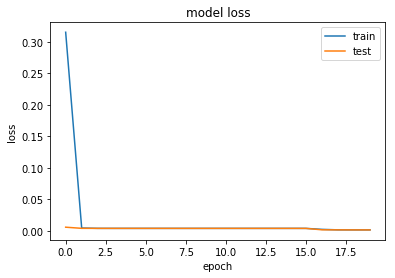

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

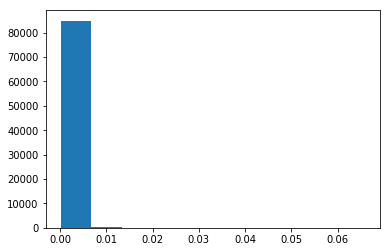

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

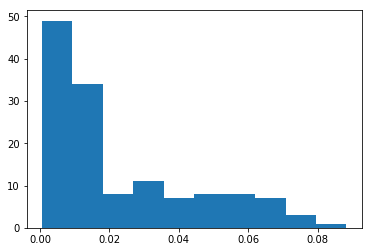

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [20]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

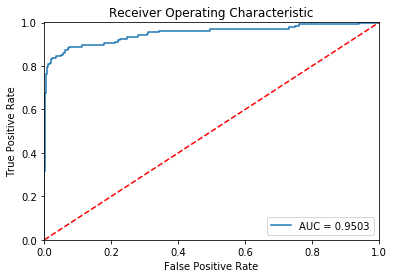

In [21]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

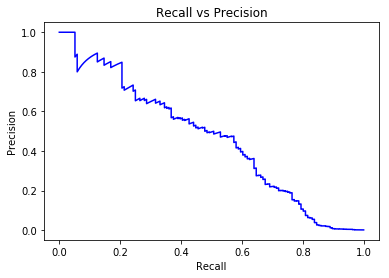

In [22]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

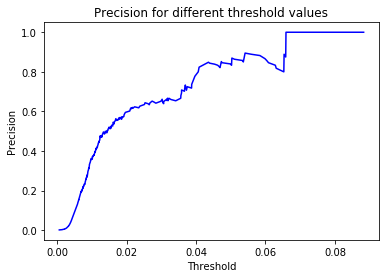

In [23]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

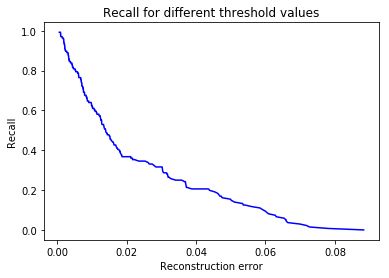

In [24]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [25]:
threshold = 0.01

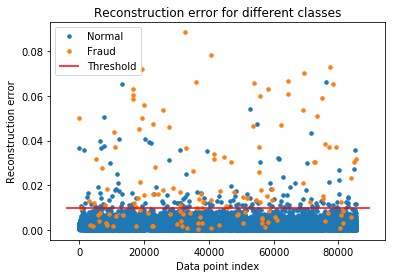

In [26]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

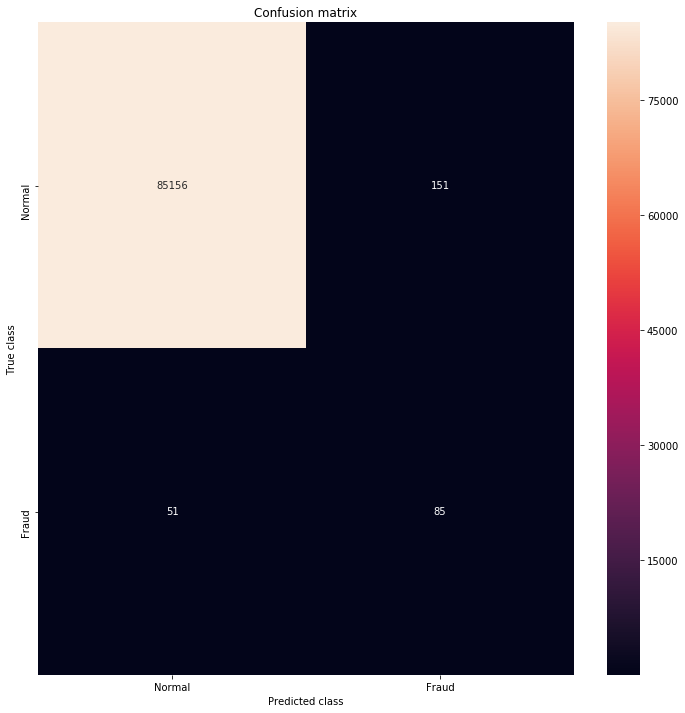

In [27]:
import seaborn as sns
LABELS = ["Normal", "Fraud"]
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()